In [28]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from ipywidgets import interactive

import warnings
warnings.filterwarnings('ignore')

From: https://towardsdatascience.com/interactive-visualization-of-decision-trees-with-jupyter-widgets-ca15dd312084

In [3]:
data = load_wine()

In [4]:
X = data.data
y = data.target

In [22]:
labels = data.feature_names
labels

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [15]:
# print(data.DESCR)

In [16]:
model = DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

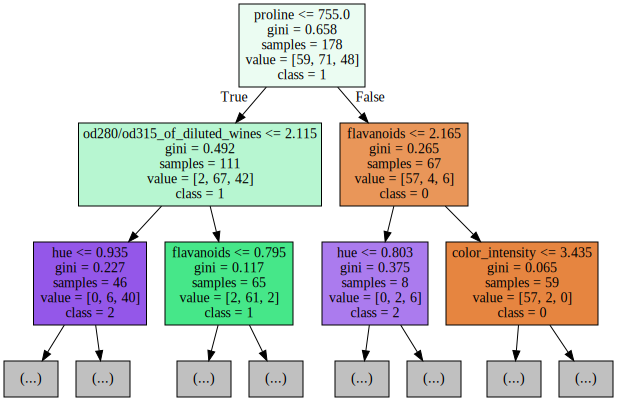

In [26]:
graph = Source(tree.export_graphviz(model
                                    , out_file=None
                                    , feature_names = labels
                                    , class_names=['0', '1', '2']
                                    , filled=True
                                    , max_depth=2))
display(SVG(graph.pipe(format='svg')))

In [42]:
def plot_tree(crit, split, depth, min_split, min_leaf=0.2):
    model = DecisionTreeClassifier(random_state=0
                                  , criterion = crit
                                  , splitter = split
                                  , max_depth = depth
                                  , min_samples_split = min_split
                                  , min_samples_leaf = min_leaf)
    model.fit(X, y)
    
    graph = Source(tree.export_graphviz(model
                                        , out_file = None
                                        , feature_names = labels
                                        , class_names = ['0', '1', '2']
                                        , filled = True))
    return display(SVG(graph.pipe(format='svg')))

In [43]:
inter = interactive(plot_tree
                   , crit = ['gini', 'entropy']
                   , split = ['best', 'random']
                   , depth = [1, 2, 3, 4]
                   , min_split=(0.1, 1)
                   , min_leaf = (0.1, 0.5))

In [44]:
display(inter)

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine

In [47]:
data = load_wine()

In [48]:
X = data.data
y = data.target

In [49]:
labels = data.feature_names

In [52]:
model = RandomForestClassifier().fit(X, y)

In [56]:
# model.estimators_

In [55]:
print(f'Number of trees: {len(model.estimators_)}')

Number of trees: 10


In [64]:
model.estimators_[0].tree_.node_count

25

In [65]:
trees = model.estimators_

In [67]:
i = 1
for tree in trees:
    print(f'Number of nodes of tree {i}: {tree.tree_.node_count}')
    i += 1

Number of nodes of tree 1: 25
Number of nodes of tree 2: 15
Number of nodes of tree 3: 19
Number of nodes of tree 4: 17
Number of nodes of tree 5: 25
Number of nodes of tree 6: 27
Number of nodes of tree 7: 23
Number of nodes of tree 8: 21
Number of nodes of tree 9: 17
Number of nodes of tree 10: 25


In [71]:
trees[0]

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1517000657, splitter='best')

In [69]:
from sklearn.tree import export_graphviz
from subprocess import check_call

In [72]:
ctn = 1
for tree in trees:
    export_graphviz(tree
                   , out_file = str(ctn)+'_tree.dot'
                   , feature_names = labels
                   , rounded = True
                   , precision = 4
                   , node_ids = True
                   , proportion = True
                   , filled = True)
    check_call(['dot','-Tpng',str(ctn)+'_tree.dot','-o',str(ctn)+'_tree.png'])
    ctn +=1

In [73]:
from sklearn.ensemble import AdaBoostClassifier

In [74]:
model = AdaBoostClassifier().fit(X, y)

In [75]:
trees = model.estimators_

In [76]:
print(f'Number of trees: {len(trees)}')

Number of trees: 50


In [78]:
model.n_classes_

3

In [79]:
model.estimator_errors_

array([0.30337079, 0.36703006, 0.33822049, 0.33333331, 0.33333334,
       0.33333336, 0.33333333, 0.33334788, 0.33333333, 0.33334865,
       0.33333333, 0.33333984, 0.33333629, 0.33333561, 0.33333333,
       0.33334933, 0.33333333, 0.33337324, 0.33333333, 0.33339265,
       0.33333333, 0.33340468, 0.33333333, 0.33341029, 0.33333333,
       0.33341342, 0.33333333, 0.33341437, 0.33333333, 0.33341527,
       0.33333333, 0.3334152 , 0.33333333, 0.33341564, 0.33333333,
       0.33341537, 0.33333333, 0.33341572, 0.33333333, 0.3334154 ,
       0.33333333, 0.33341573, 0.33333333, 0.33341541, 0.33333333,
       0.33341573, 0.33333333, 0.33341542, 0.33333333, 0.33341573])

In [81]:
model.feature_importances_

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.48, 0.  , 0.  , 0.02, 0.24,
       0.22, 0.02])

In [82]:
labels

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [106]:
import numpy as np
import pandas as pd

In [107]:
a = np.array([[1, 2], [3, 4]])

In [108]:
a = []
for i, x in enumerate(zip(model.feature_importances_, labels)):
    a.append(list(x))
    

In [109]:
a

[[0.0, 'alcohol'],
 [0.0, 'malic_acid'],
 [0.0, 'ash'],
 [0.0, 'alcalinity_of_ash'],
 [0.0, 'magnesium'],
 [0.02, 'total_phenols'],
 [0.48, 'flavanoids'],
 [0.0, 'nonflavanoid_phenols'],
 [0.0, 'proanthocyanins'],
 [0.02, 'color_intensity'],
 [0.24, 'hue'],
 [0.22, 'od280/od315_of_diluted_wines'],
 [0.02, 'proline']]

In [110]:
a_np = np.array(a)

In [111]:
a_np.sort()

In [112]:
a_np

array([['0.0', 'alcohol'],
       ['0.0', 'malic_acid'],
       ['0.0', 'ash'],
       ['0.0', 'alcalinity_of_ash'],
       ['0.0', 'magnesium'],
       ['0.02', 'total_phenols'],
       ['0.48', 'flavanoids'],
       ['0.0', 'nonflavanoid_phenols'],
       ['0.0', 'proanthocyanins'],
       ['0.02', 'color_intensity'],
       ['0.24', 'hue'],
       ['0.22', 'od280/od315_of_diluted_wines'],
       ['0.02', 'proline']], dtype='<U32')

In [114]:
a_df = pd.DataFrame(a, columns=['importance','feature'])

In [115]:
a_df

,importance,feature
0,0.00,alcohol
1,0.00,malic_acid
2,0.00,ash
3,0.00,alcalinity_of_ash
4,0.00,magnesium
5,0.02,total_phenols
6,0.48,flavanoids
7,0.00,nonflavanoid_phenols
8,0.00,proanthocyanins
9,0.02,color_intensity


In [131]:
a_df_sorted = a_df.sort_values(by=['importance'], ascending=False)
a_df_sorted

,importance,feature
6,0.48,flavanoids
10,0.24,hue
11,0.22,od280/od315_of_diluted_wines
5,0.02,total_phenols
9,0.02,color_intensity
12,0.02,proline
0,0.00,alcohol
1,0.00,malic_acid
2,0.00,ash
3,0.00,alcalinity_of_ash


In [132]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (9, 8)

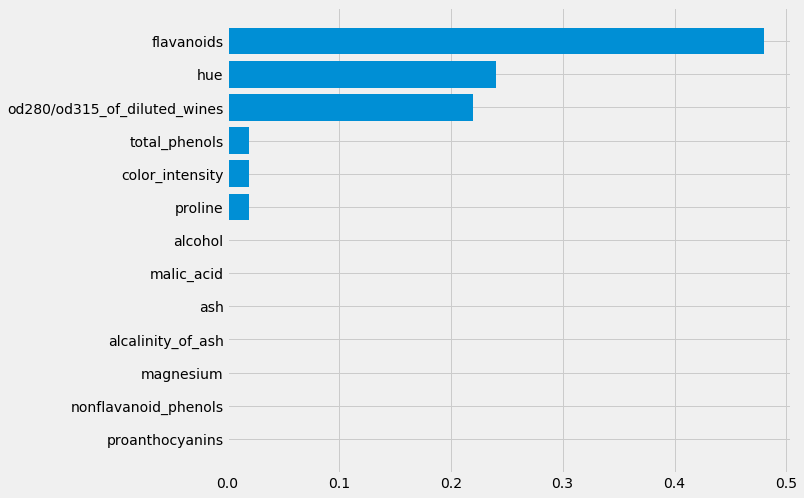

In [137]:
plt.barh(a_df_sorted.feature, a_df_sorted.importance)
plt.gca().invert_yaxis();